In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
def plot_training_curve(filename, exclude_list=None):
    if exclude_list is None:
        exclude_list = list()
        
    base_path = "Experimental_results"
    method_names = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]
    
    for exclude in exclude_list:
        method_names.remove(exclude)

    full_paths = [os.path.join(base_path, method_name, filename) for method_name in method_names]

    datas = [pd.read_csv(full_path) for full_path in full_paths]

    iterations = datas[0]['iteration']

    def plot_subplot(position, metric, y_label, title):
        ax = plt.subplot(3, 2, position)
        for i, method in enumerate(method_names):
            ax.plot(iterations, datas[i][metric], label=method)
        ax.set_title(title)
        ax.set_xlabel('Iterations')
        ax.set_ylabel(y_label)
        ax.legend()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.figure(figsize=(15, 15))

    plot_subplot(1, 'loss', 'Loss', 'Loss over Iterations')

    plot_subplot(2, 'accuracy', 'Accuracy', 'Accuracy over Iterations')

    plot_subplot(3, 'fpr', 'False Positive Rate', 'FPR over Iterations')

    plot_subplot(4, 'tpr', 'True Positive Rate', 'TPR over Iterations')

    plot_subplot(5, 'ber', 'Balanced Error Rate', 'BER over Iterations')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


# UNSW-NB15
## Training set FedAvg, S-ADMM, FedEM comparison

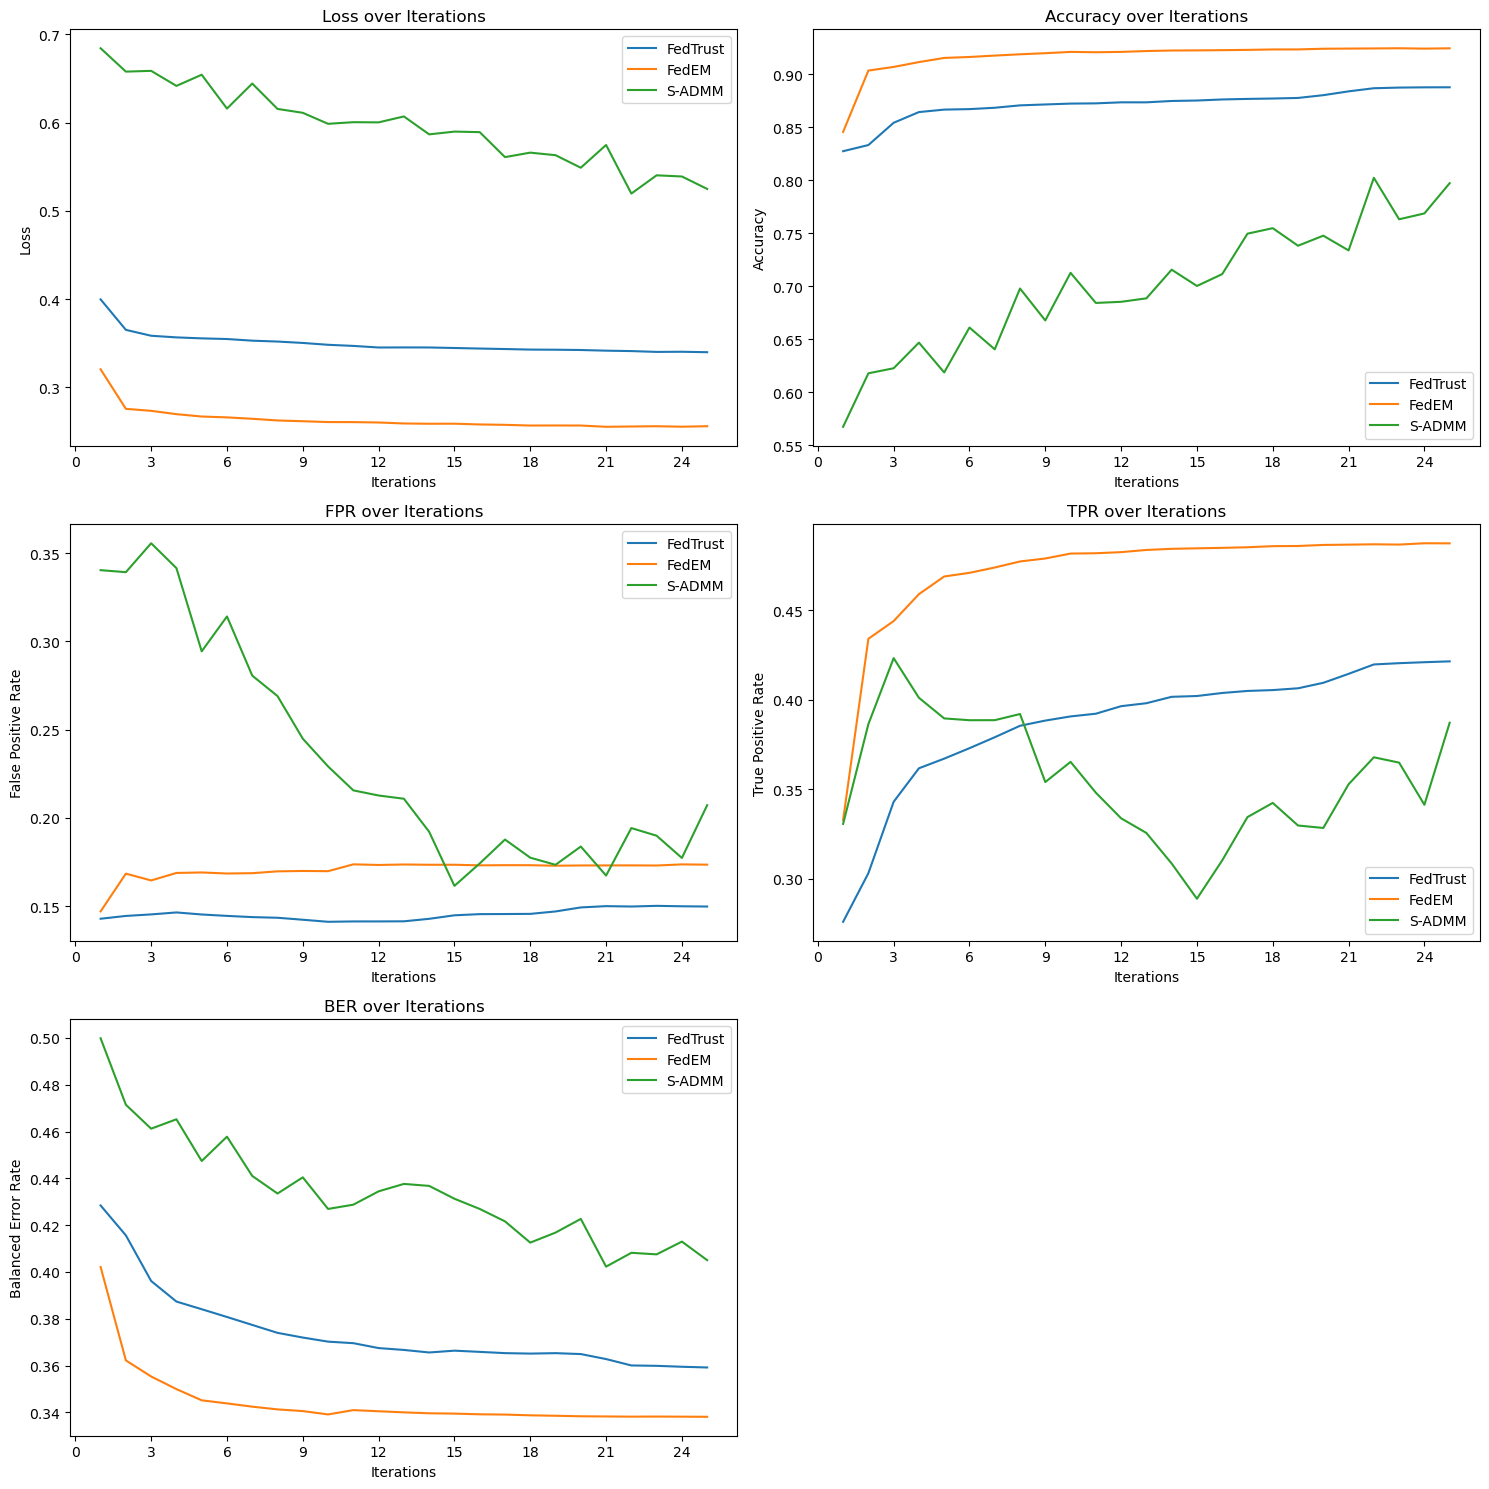

In [3]:
plot_training_curve("train_measures_unsw-nb15.csv", exclude_list=['FedEM_dqn_10','FedEM_dqn_50','FedEM_random_10','FedEM_random_50', 'FedEM_dqn_30', 'FedEM_random_30', 'FedAvg', 'Local_SVM'])

## Validation set FedAvg, S-ADMM, FedEM comparison

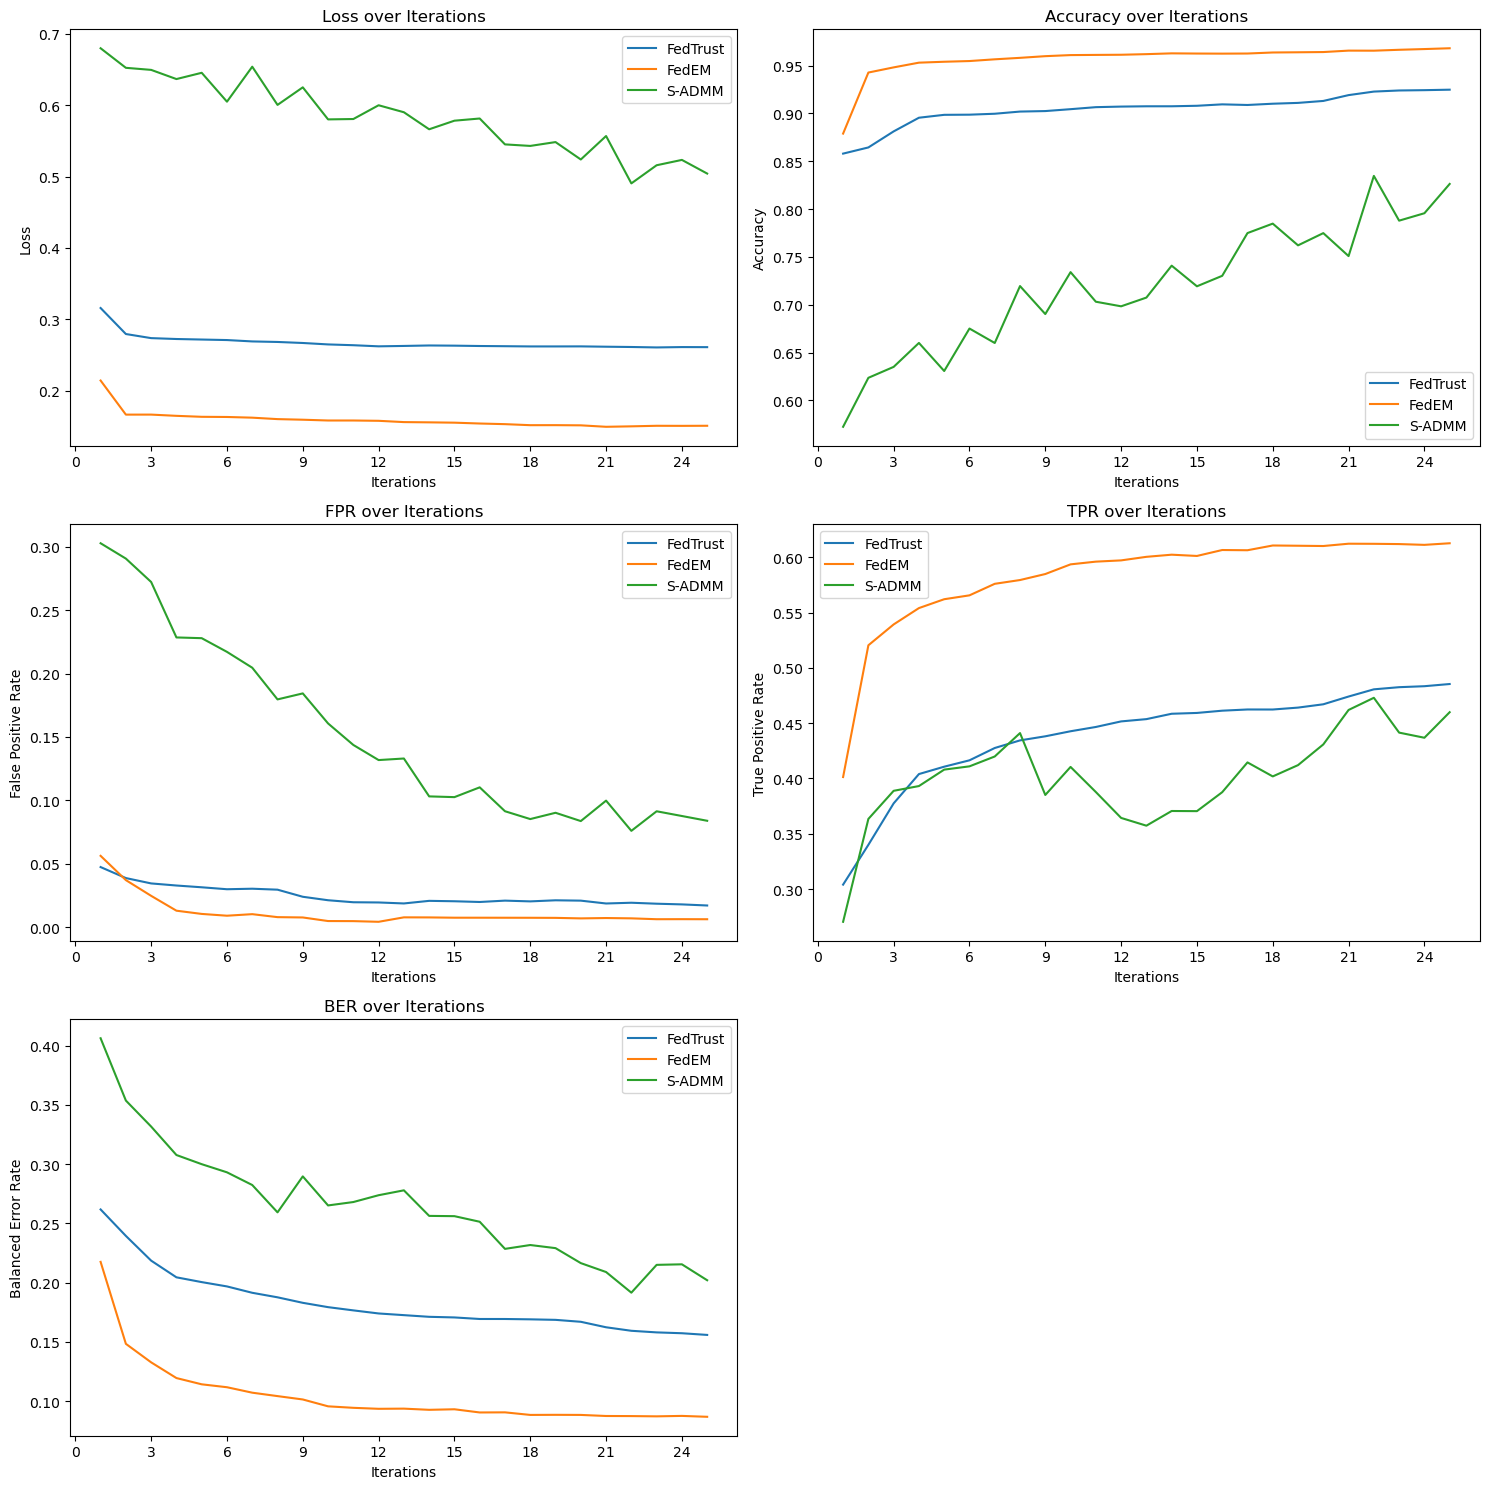

In [4]:
plot_training_curve("val_measures_unsw-nb15.csv", exclude_list=['FedEM_dqn_10','FedEM_dqn_50','FedEM_random_10','FedEM_random_50','FedEM_dqn_30', 'FedEM_random_30', 'FedAvg', 'Local_SVM'])

## Training set FedEM, with DQN, with random comparison

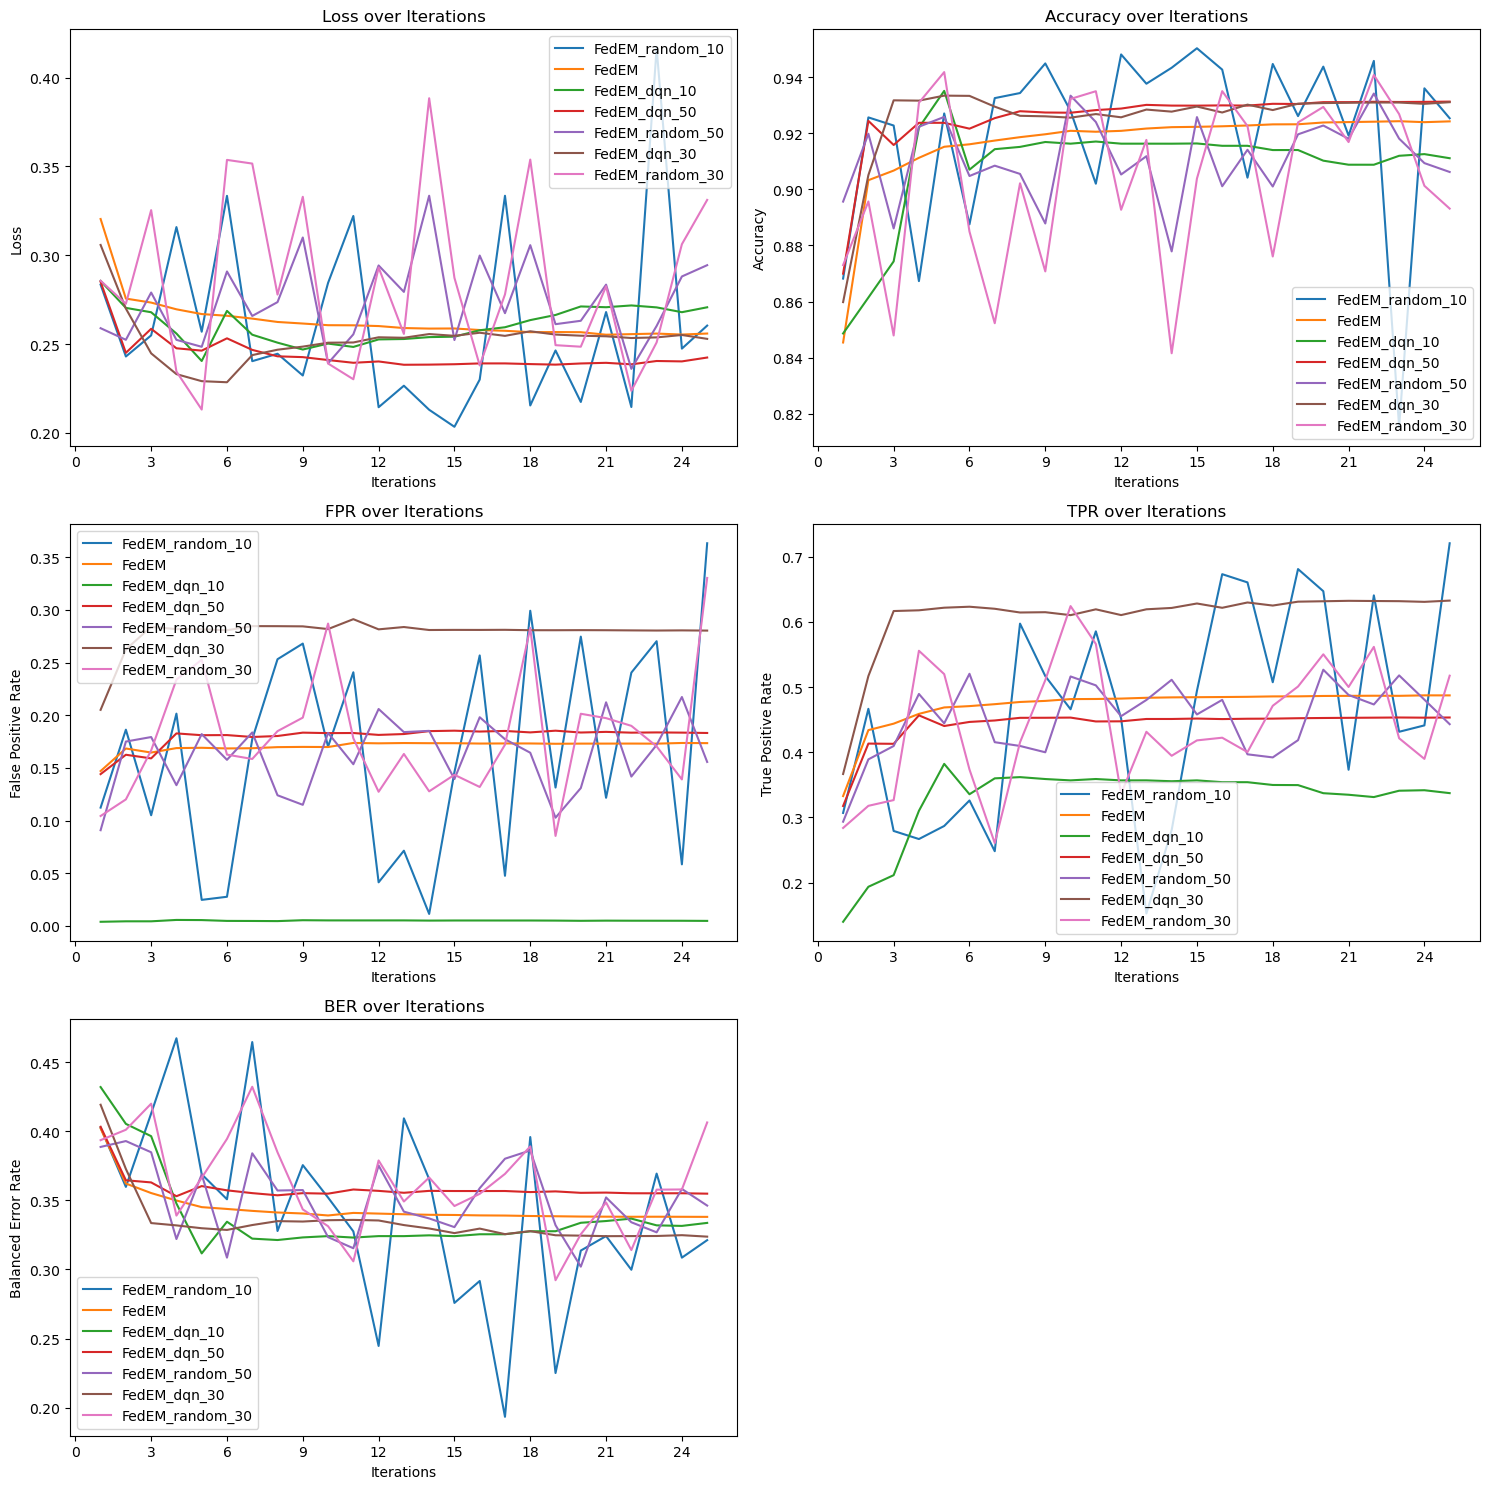

In [11]:
plot_training_curve("train_measures_unsw-nb15.csv", exclude_list=['FedAvg','S-ADMM', 'Local_SVM', 'FedTrust'])

## Validation set FedEM, with DQN, with random comparison

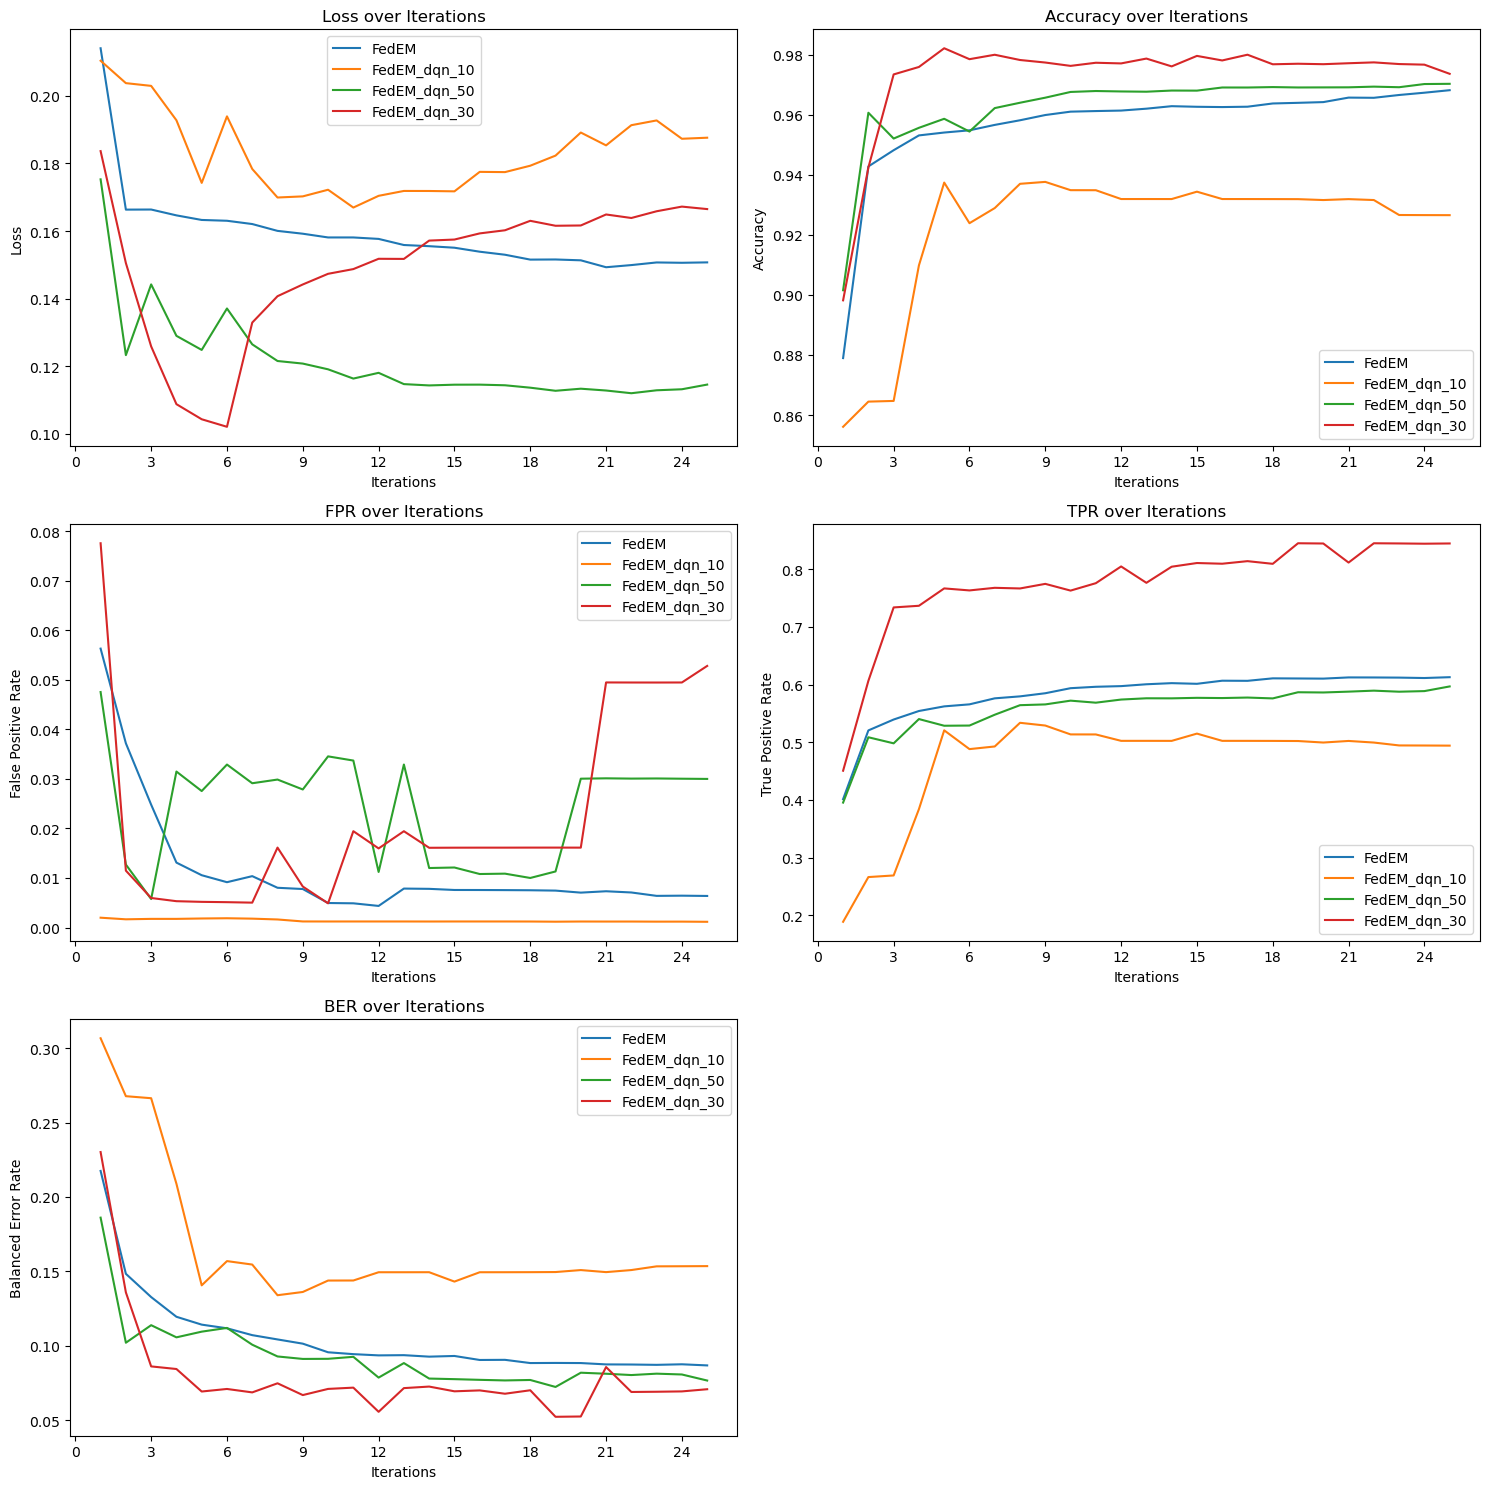

In [12]:
plot_training_curve("val_measures_unsw-nb15.csv", exclude_list=['FedAvg','S-ADMM','FedEM_random_10','FedEM_random_50', 'FedEM_random_30', 'Local_SVM', 'FedTrust'])

# N-ABIOT
## Training set FedAvg, S-ADMM, FedEM comparison

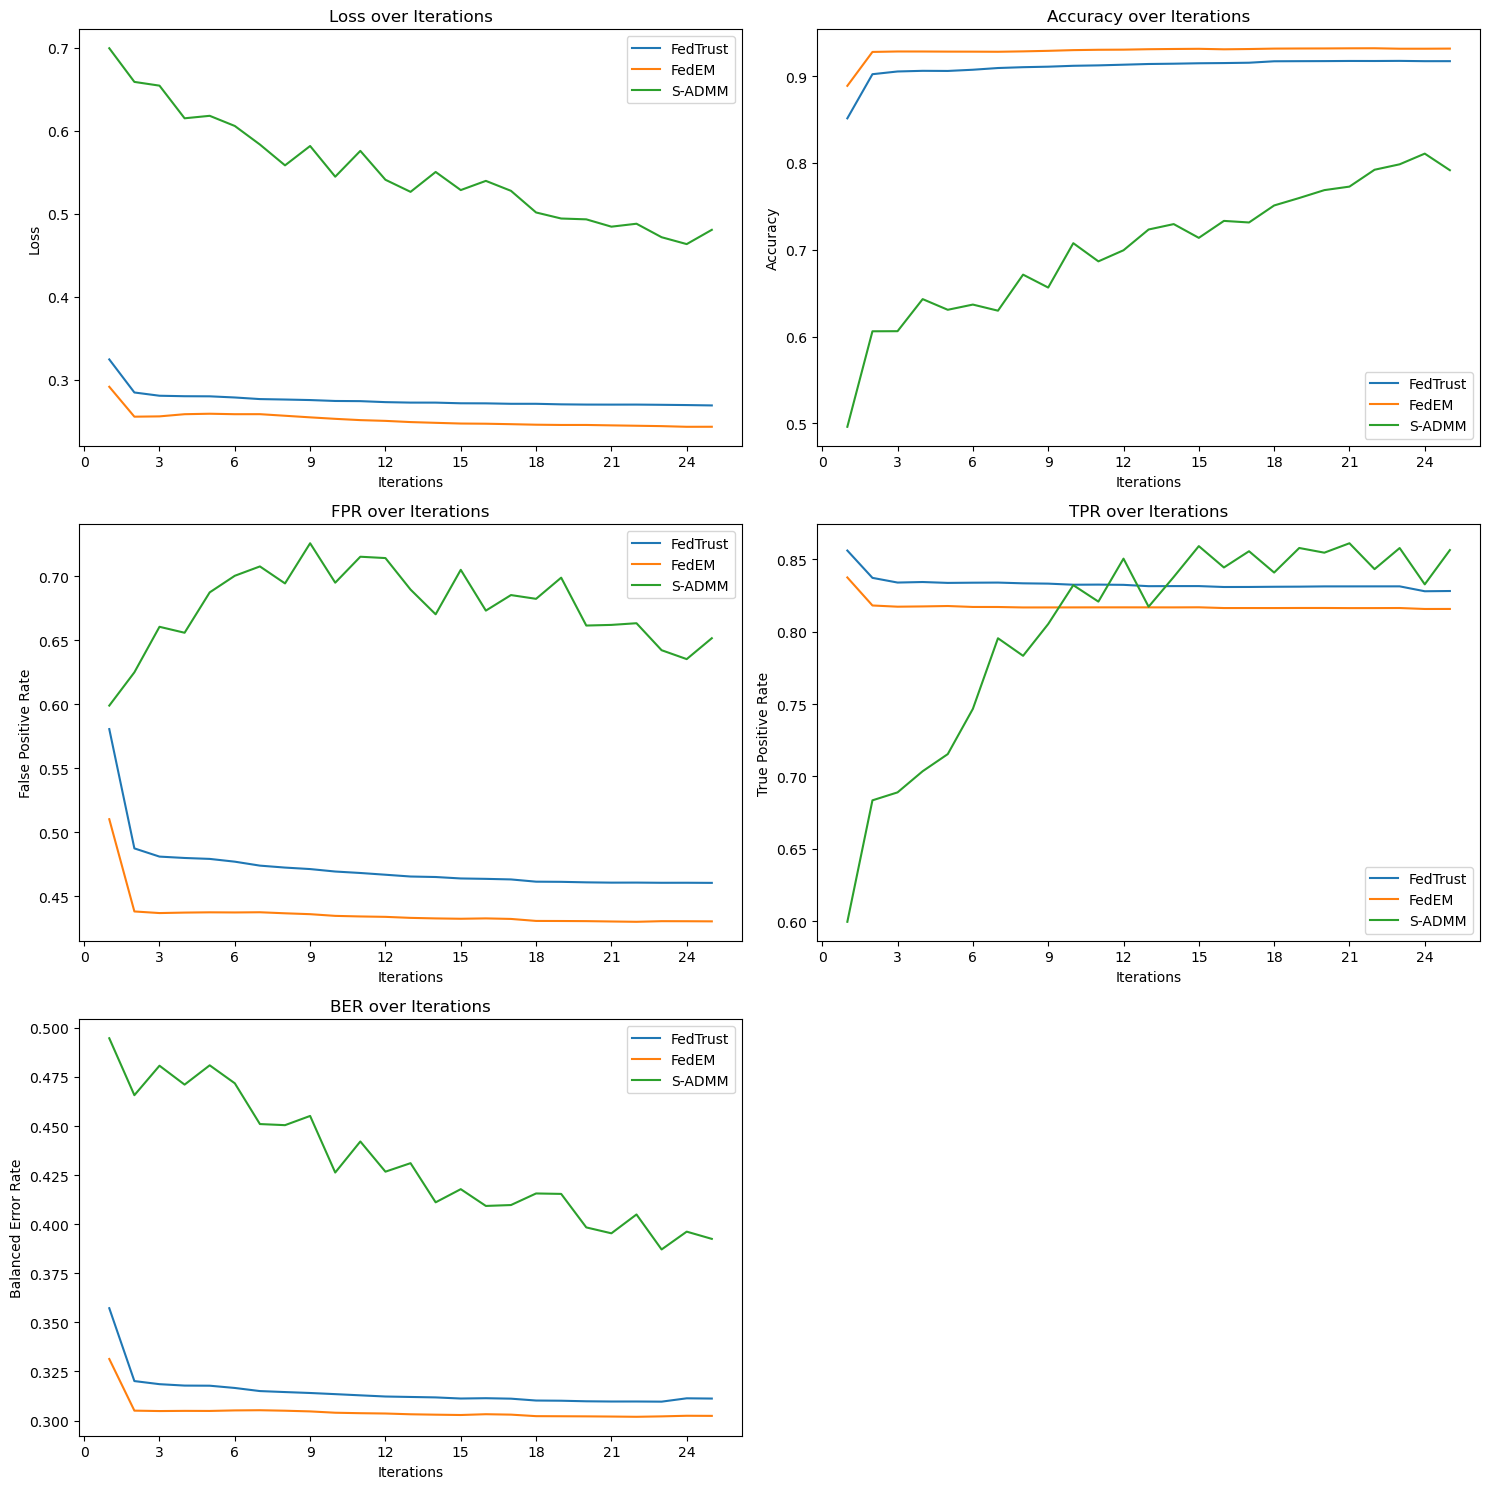

In [14]:
plot_training_curve("train_measures_n-baiot.csv", exclude_list=['FedEM_dqn_10','FedEM_dqn_50','FedEM_random_10','FedEM_random_50', 'FedEM_dqn_30', 'FedEM_random_30', 'FedAvg', 'Local_SVM'])

## Validation set FedAvg, S-ADMM, FedEM comparison

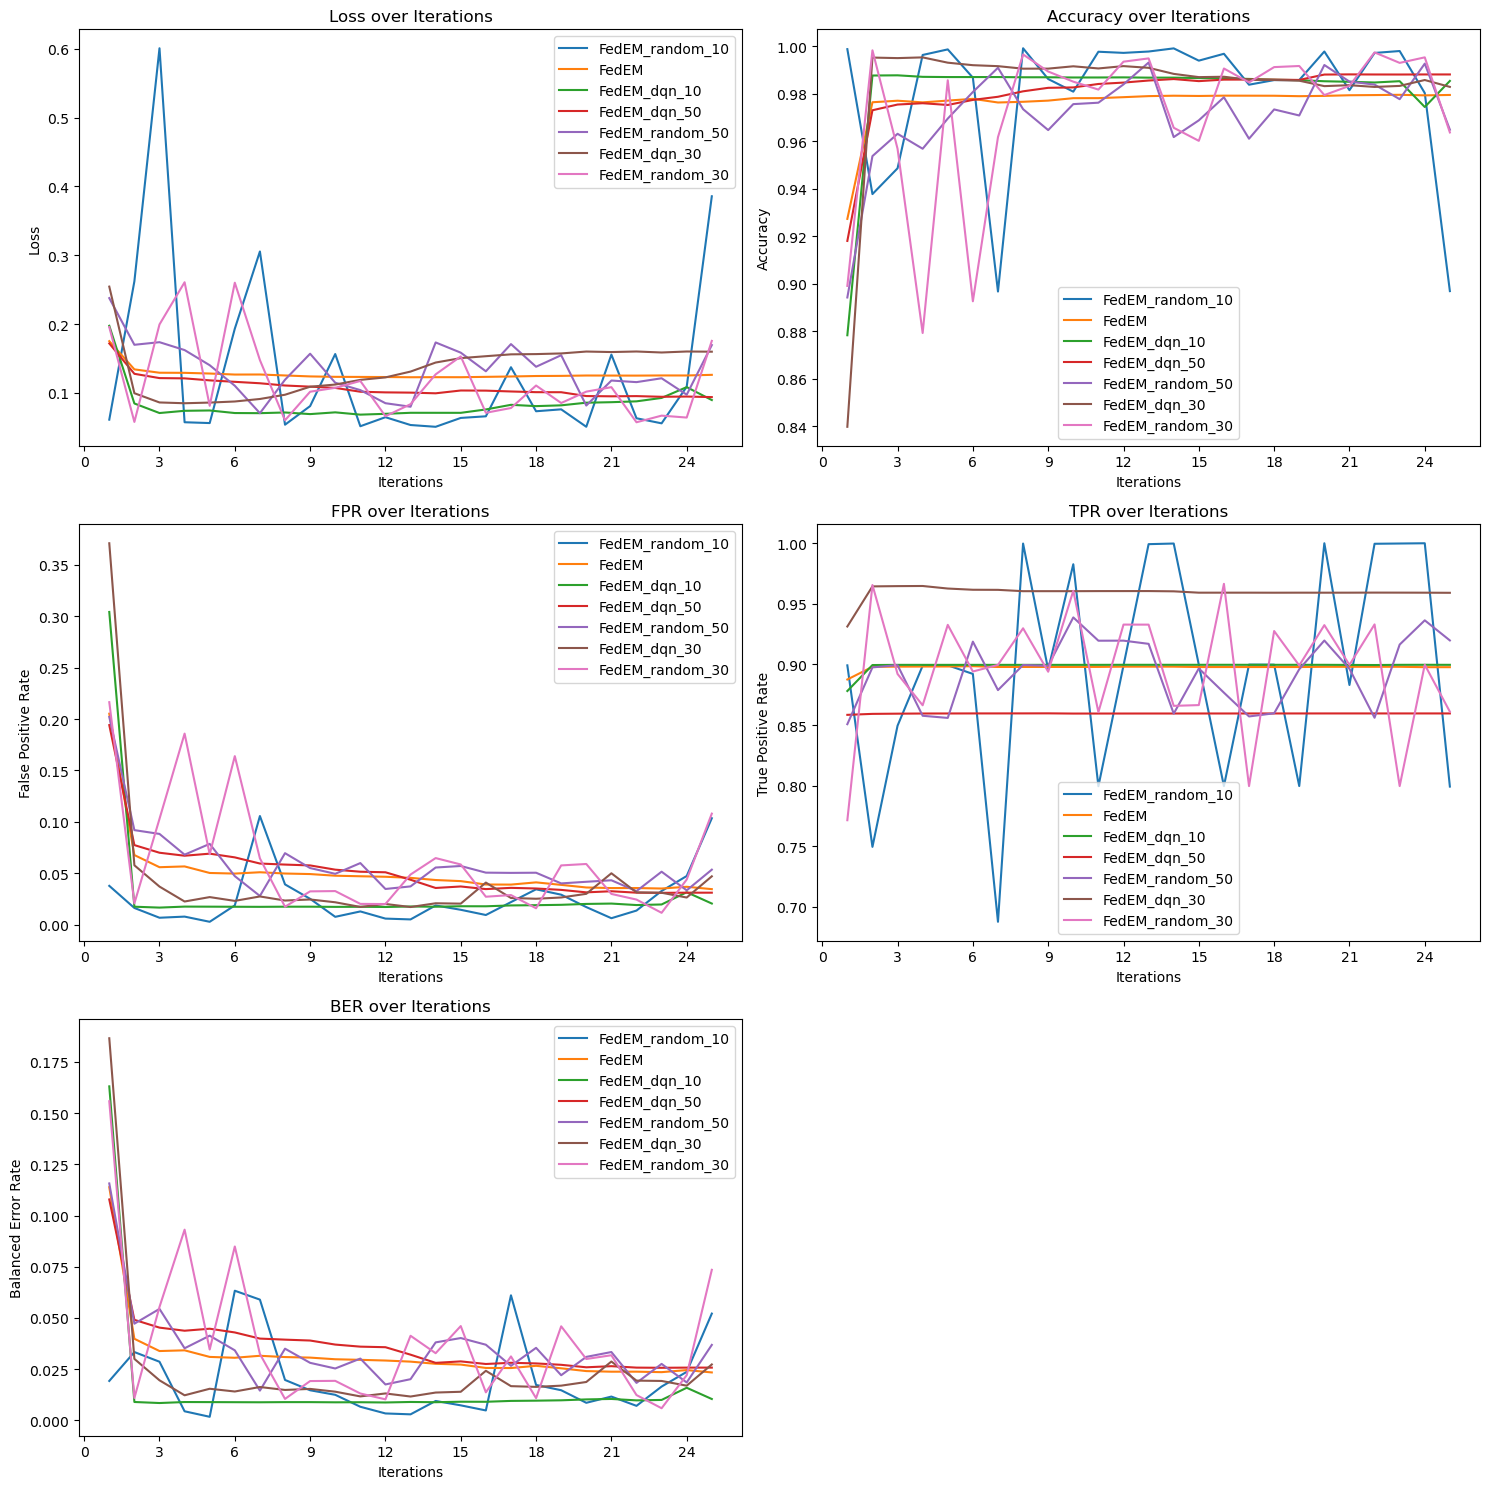

In [18]:
plot_training_curve("val_measures_n-baiot.csv", exclude_list=['FedTrust', 'FedAvg', 'Local_SVM', 'S-ADMM'])

## Training set FedEM, with DQN, with random comparison

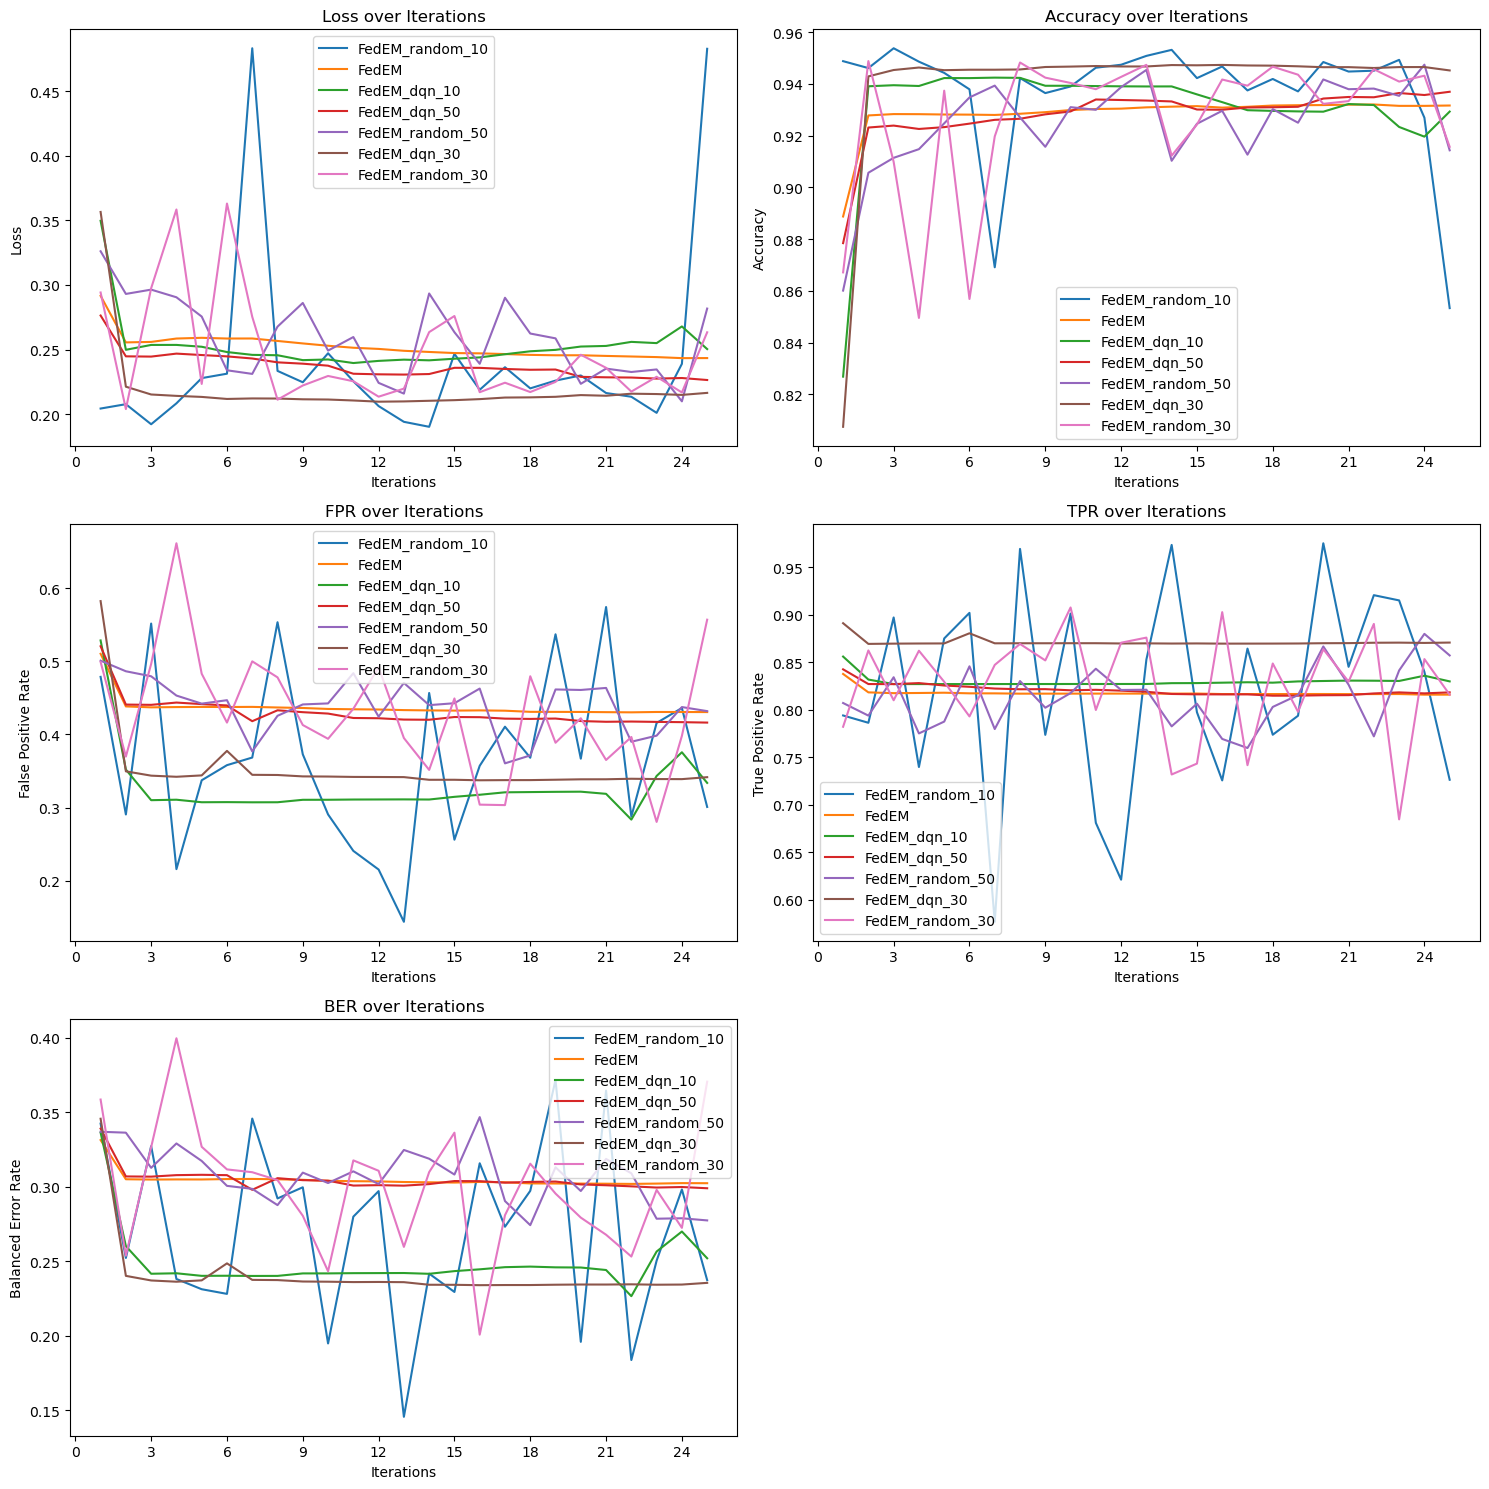

In [20]:
plot_training_curve("train_measures_n-baiot.csv", exclude_list=['FedAvg', 'S-ADMM', 'FedTrust', 'Local_SVM'])

## Validation set FedEM, with DQN, with random comparison

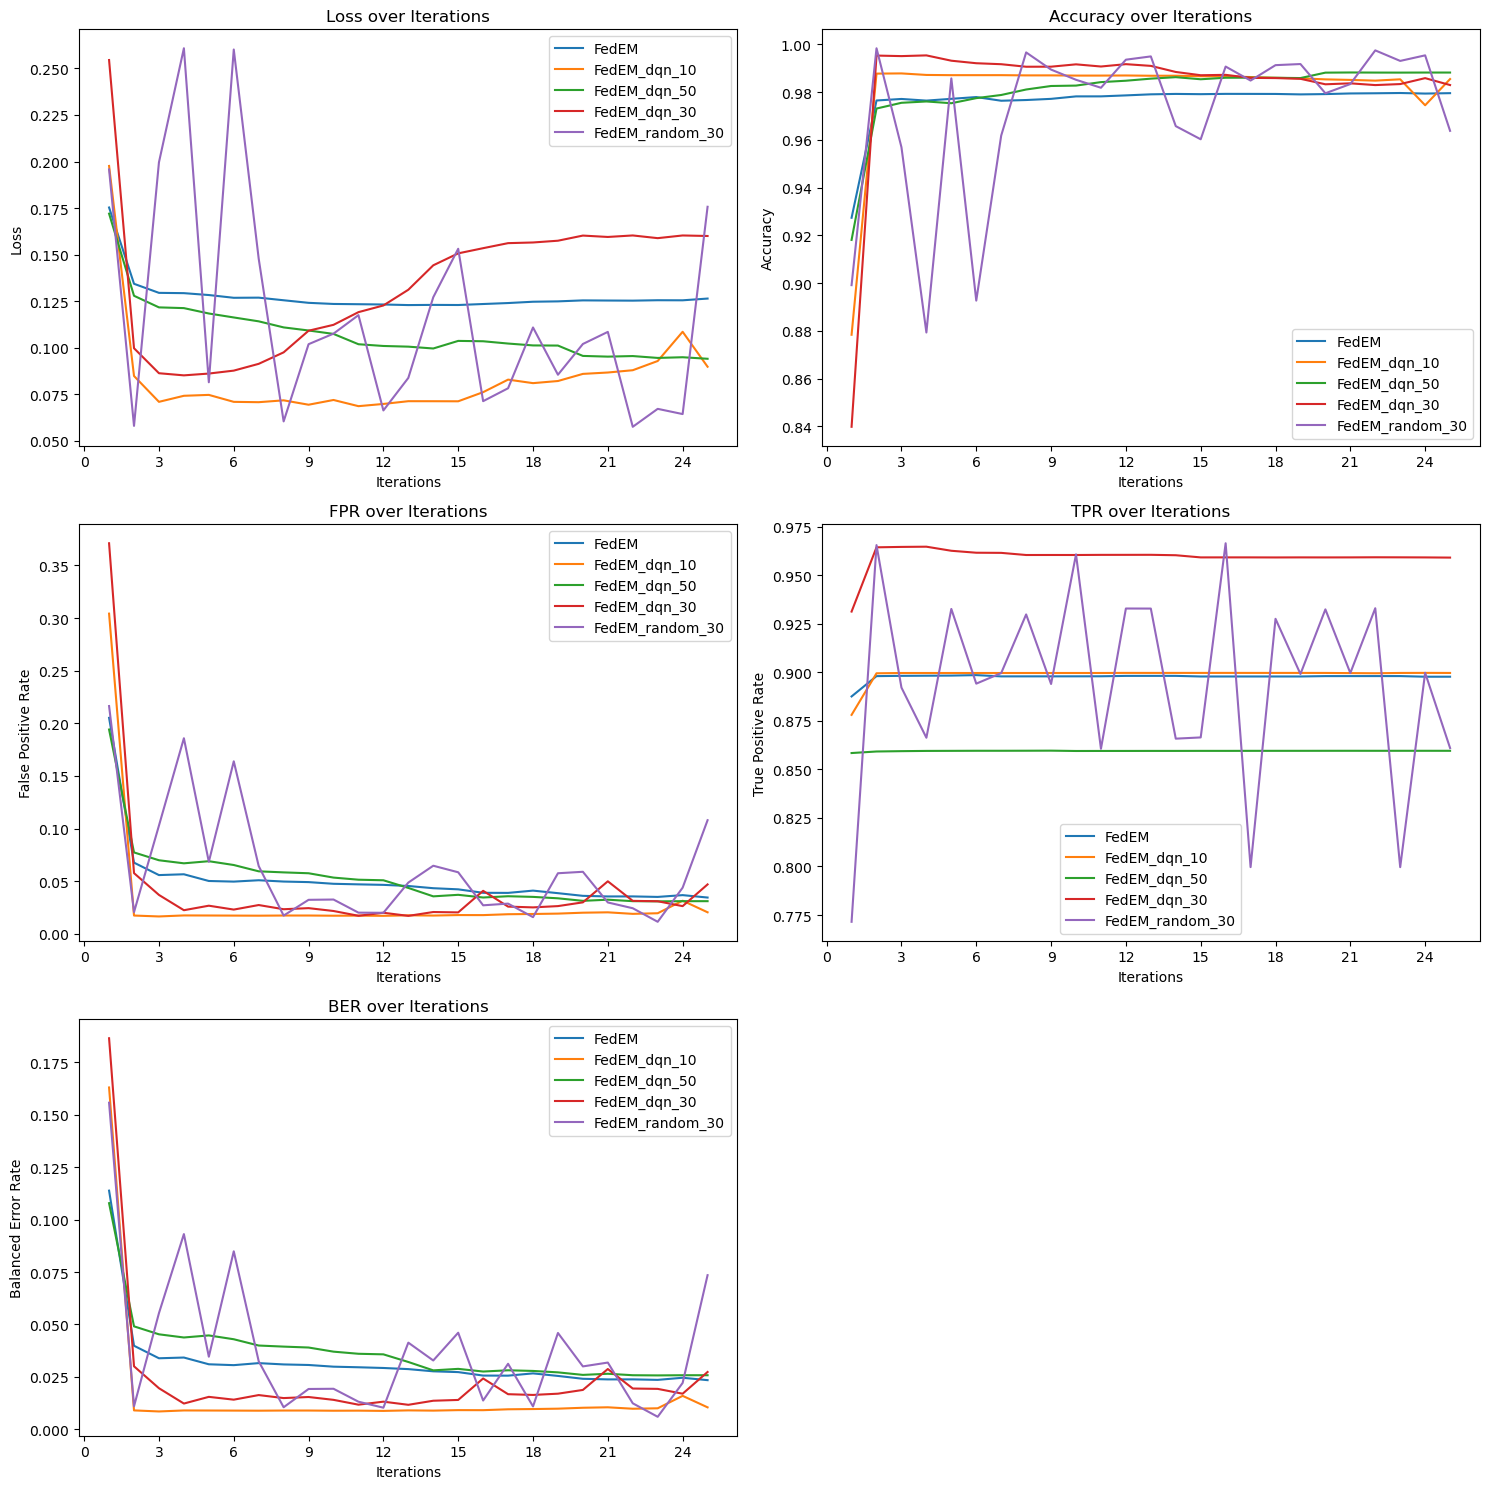

In [21]:
plot_training_curve("val_measures_n-baiot.csv", exclude_list=['FedEM_random_10','FedEM_random_50', 'S-ADMM', 'FedAvg', 'FedTrust', 'Local_SVM'])